In [1]:
# Import packages
import os

import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import numpy as np
import math
import seaborn as sns

# Get country boundaries data
et.data.get_data(url="https://ndownloader.figshare.com/files/22507058")

# Get GRanD database data
# http://globaldamwatch.org/

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [2]:
# Create path and import country boundaries
countries_path = os.path.join("earthpy-downloads", "country-borders",
                              "99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp")
countries_border = gpd.read_file(countries_path)

# Define path to GRanD database file
plot_centroid_path = os.path.join("GRanD_Version_1_3", "GRanD_dams_v1_3.shp")

# Import shapefile using geopandas
grand_plot_locations = gpd.read_file(plot_centroid_path)

# Subset necessary columns to working df
global_dams = grand_plot_locations[[
    'GRAND_ID', 'COUNTRY', 'MAIN_USE', 'CATCH_SKM', 'geometry']]

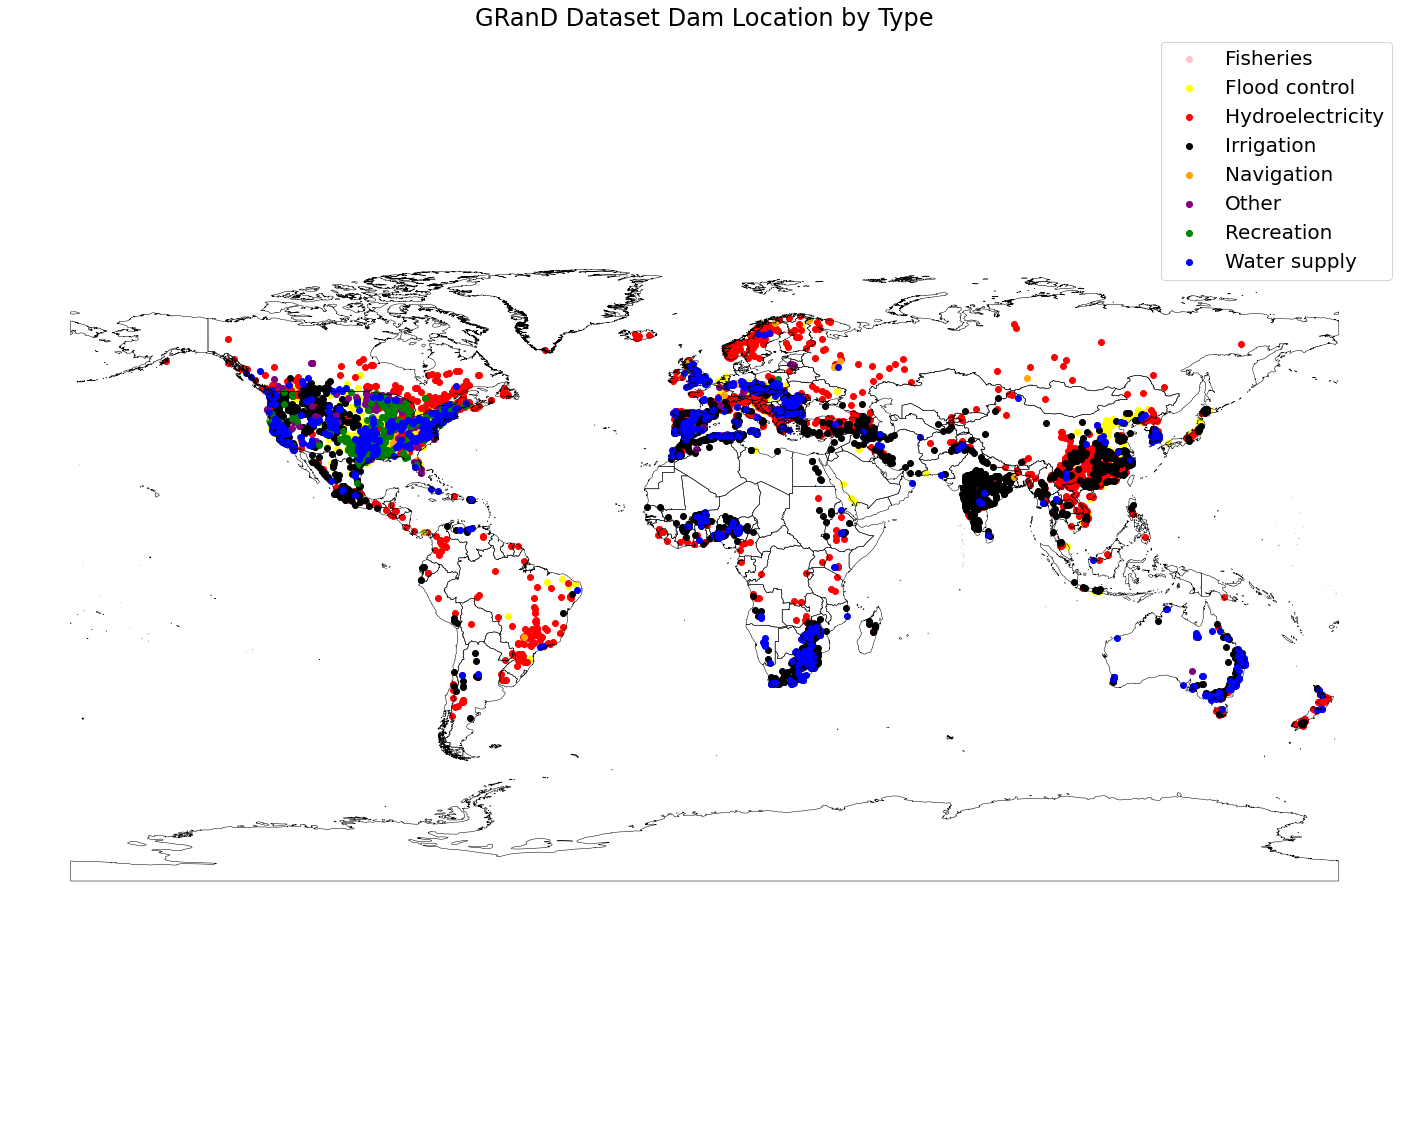

In [3]:
# Create global map figure of dam types

# Color dictionary
dam_color = {'Irrigation': 'black',
             'Hydroelectricity': 'red',
             'Water supply': 'blue',
             'Flood control': 'yellow',
             'Recreation': 'green',
             'Other': 'purple',
             'Navigation': 'orange',
             'Fisheries': 'pink',
             'Unknown': 'magenta'}

# Plot the data
fig, ax = plt.subplots(figsize=(25, 20))

# Plot each dam colored by Main Use
for ctype, dams in global_dams.groupby('MAIN_USE'):
    color_dam = dam_color[ctype]
    label = ctype
    dams.plot(color=color_dam,
              ax=ax,
              label=label)

# Plot the global countries borders map
countries_border.plot(color="none", edgecolor="black", linewidth=.5, ax=ax)

# Set legend, title, and plot settings
ax.legend()
ax.set_title("GRanD Dataset Dam Location by Type", fontsize=24)
plt.legend(fontsize=20)
ax.set_axis_off()
plt.axis('equal')

plt.show()

In [4]:
# Workflow for splitting dams by continent in separate df and process

# Create list of countries in each continent
africa_country = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Cameroon', 
                  'Congo', 'Congo (DRC)', 'Egypt', 'Eritrea', 'Ethiopia', 'Gabon',
                  'Ghana', 'Guinea', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 
                  'Libya', 'Madagascar', 'Mali', 'Mauritania', 'Morocco', 'Mozambique',
                  'Namibia', 'Nigeria', 'Senegal', 'Sierra Leone', 'South Africa', 
                  'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 
                  'Zambia', 'Zimbabwe']

asia_country = ['Afghanistan', 'Bahrain', "Bangladesh", "Bhutan", "Brunei", 
                'Myanmar (Burma)', 'Myanmar', 'Cambodia', 'China', 'East Timor',
                'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan',
                'Kazakhstan', 'North Korea', 'South Korea', 'Kuwait', 'Kyrgyzstan',
                'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Nepal',
                'Oman', 'Pakistan', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia',
                'Singapore', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand',
                'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan',
                'Vietnam', 'Yemen']

europe_country = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
                  'Belgium','Bosnia', 'Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
                  'Czech Republic', 'Denmark','Estonia', 'Finland', 'France',
                  'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
                  'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
                  'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 
                  'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino',
                  'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
                  'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City']

namerica_country = ['Antigua', 'Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada',
                    'Costa Rica', 'Cuba', 'Dominica', 'Congo (DRC)', ' Dominican Republic',
                    'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras',
                    'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts', 
                    'Nevis', 'Saint Lucia', 'Saint Vincent', 'Grenadines', 'Trinidad',
                    'Tobago', 'United States']

samerica_country = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
                    'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']

oceania_country = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia',
                   'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa',
                   'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

# Select for dams by continent to new df
dam_africa = global_dams[global_dams['COUNTRY'].isin(africa_country)]
dam_asia = global_dams[global_dams['COUNTRY'].isin(asia_country)]
dam_europe = global_dams[global_dams['COUNTRY'].isin(europe_country)]
dam_namerica = global_dams[global_dams['COUNTRY'].isin(namerica_country)]
dam_samerica = global_dams[global_dams['COUNTRY'].isin(samerica_country)]
dam_oceania = global_dams[global_dams['COUNTRY'].isin(oceania_country)]

# Create uses to add
Fisheries = {'MAIN_USE': "Fisheries"}
Navigation = {'MAIN_USE': "Navigation"}
Recreation = {'MAIN_USE': "Recreation"}
Other = {'MAIN_USE': "Other"}

# Add use rows to continent df as needed
dam_africa = dam_africa.append(Fisheries, ignore_index=True)
dam_africa = dam_africa.append(Navigation, ignore_index=True)

dam_asia = dam_asia.append(Fisheries, ignore_index=True)
dam_asia = dam_asia.append(Recreation, ignore_index=True)

dam_samerica = dam_samerica.append(Fisheries, ignore_index=True)
dam_samerica = dam_samerica.append(Recreation, ignore_index=True)
dam_samerica = dam_samerica.append(Other, ignore_index=True)

dam_oceania = dam_oceania.append(Fisheries, ignore_index=True)
dam_oceania = dam_oceania.append(Navigation, ignore_index=True)

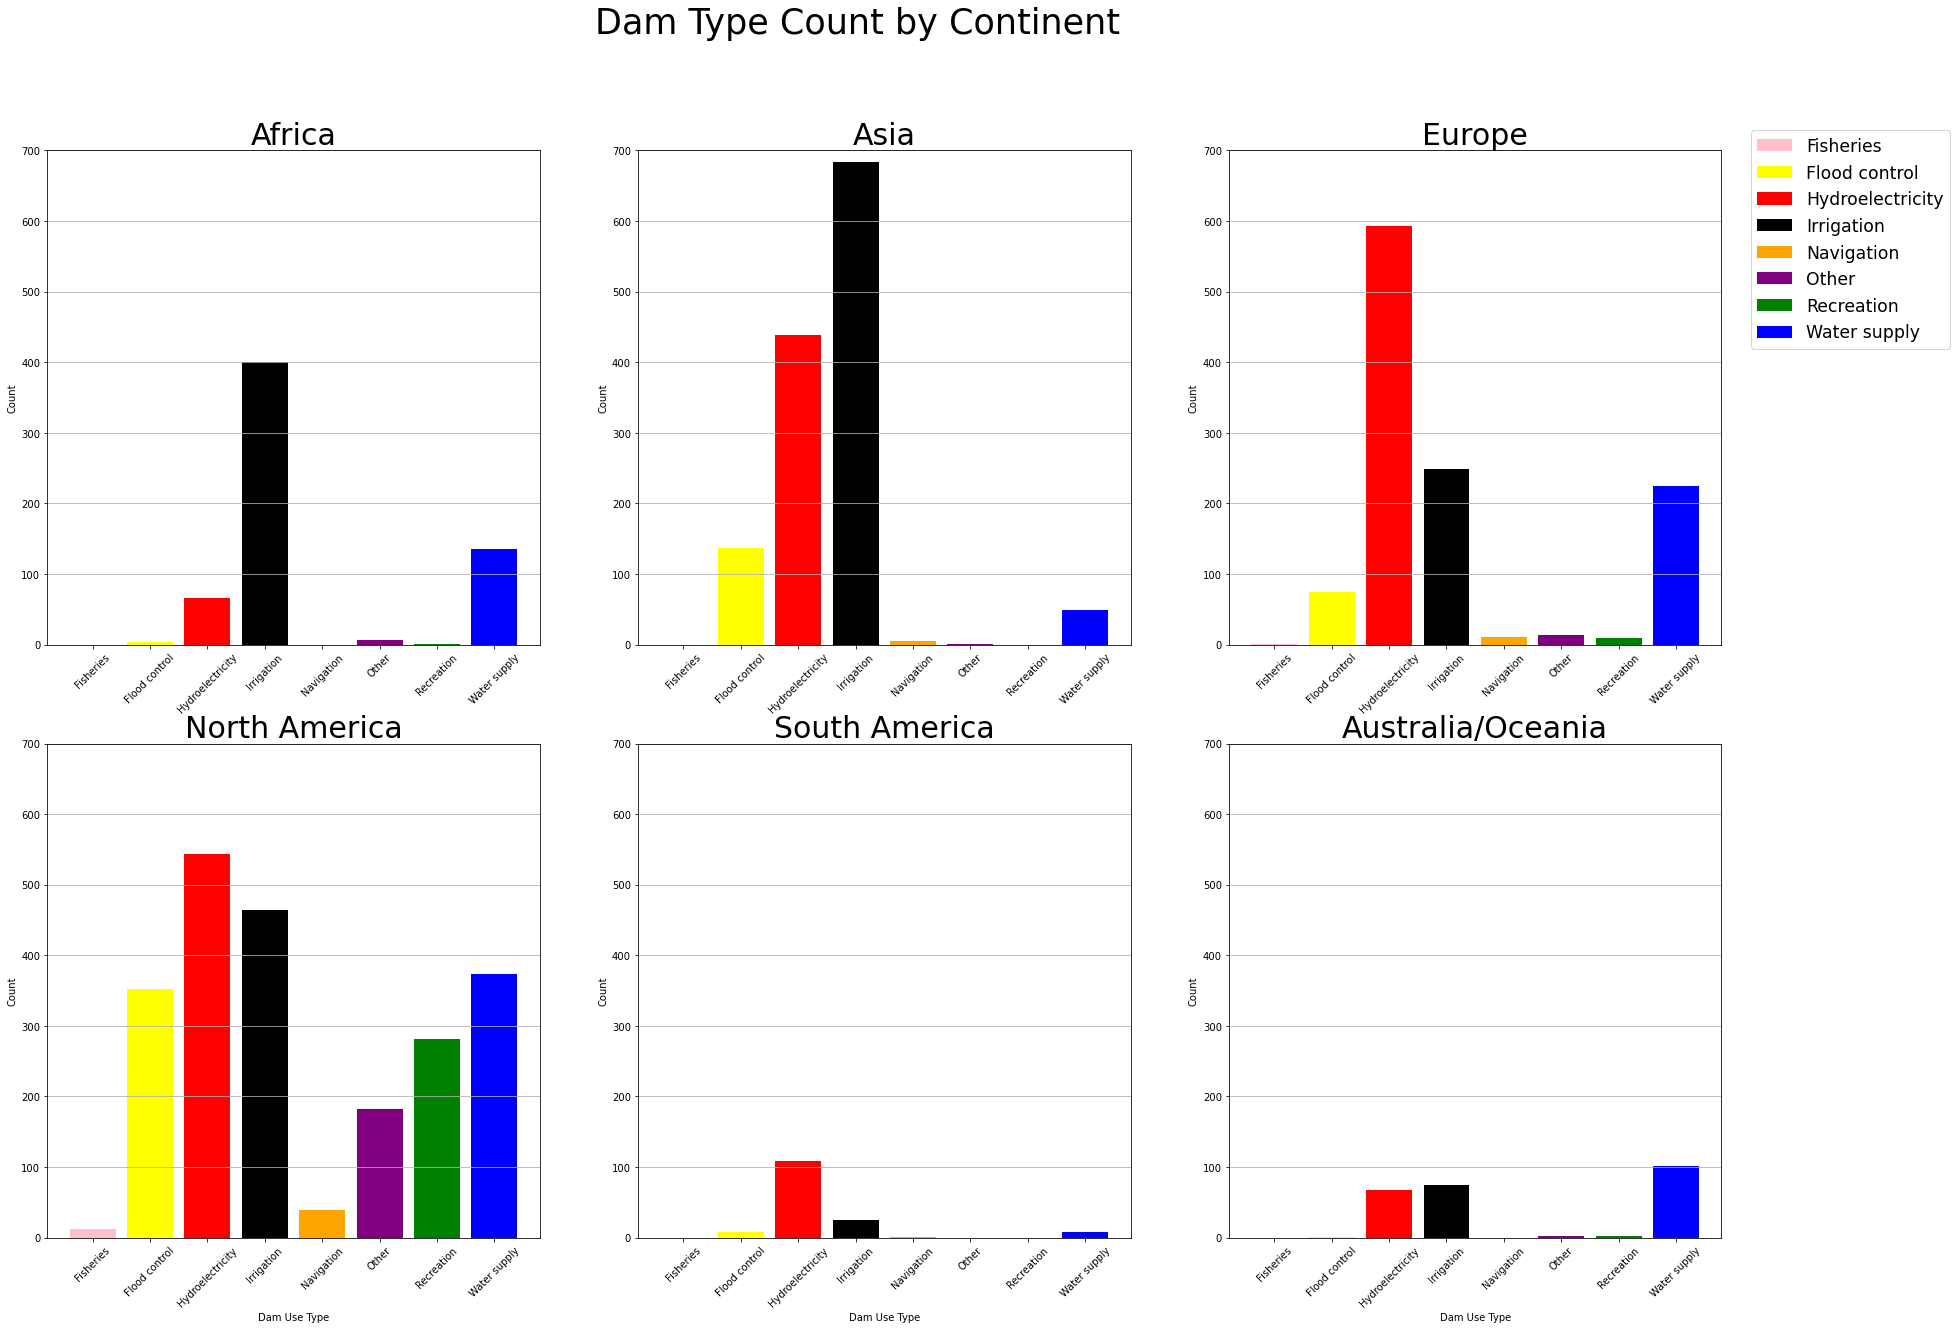

In [5]:
# Create boxplot figure of dam type counts by continent

# Plot the data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    ncols=3, nrows=2, figsize=(30, 20))
fig.suptitle("Dam Type Count by Continent", fontsize=35)

# Create Plots
# Plot Africa
for ctype, dam in dam_africa.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax1.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax1.set(ylabel="Count")
    ax1.set_ylim(0, 700)
    ax1.set_title('Africa', fontsize=30)
ax1.grid(axis="y")

# Plot Asia
for ctype, dam in dam_asia.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax2.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax2.set_ylim(0, 700)
    ax2.set(title="Asia",
            ylabel="Count")
    ax2.set_title('Asia', fontsize=30)
ax2.grid(axis="y")

# Plot Europe
for ctype, dam in dam_europe.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax3.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax3.set_ylim(0, 700)
    ax3.set(title="Europe",
            ylabel="Count")
    ax3.set_title('Europe', fontsize=30)
ax3.grid(axis="y")

# Plot North America
for ctype, dam in dam_namerica.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax4.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax4.set(title="North America",
            xlabel="Dam Use Type",
            ylabel="Count")
    ax4.set_ylim(0, 700)
    ax4.set_title('North America', fontsize=30)
ax4.grid(axis="y")

# Plot South America
for ctype, dam in dam_samerica.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax5.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax5.set_ylim(0, 700)
    ax5.set(title="South America",
            xlabel="Dam Use Type",
            ylabel="Count")
    ax5.set_title('South America', fontsize=30)
ax5.grid(axis="y")

# Plot Australia and Oceania
for ctype, dam in dam_oceania.groupby("MAIN_USE"):
    color_dam = dam_color[ctype]
    label = ctype
    dam_count = dam.count()
    ax6.bar(ctype,
            dam_count["GRAND_ID"],
            color=color_dam,
            label=label)
    ax6.set_ylim(0, 700)
    ax6.set(title="Australia/Oceania",
            xlabel="Dam Use Type",
            ylabel="Count")
    ax6.set_title('Australia/Oceania', fontsize=30)
ax6.grid(axis="y")

# Rotate x-axis labels
plt.setp((ax1.get_xticklabels(), ax2.get_xticklabels(), ax3.get_xticklabels(
), ax4.get_xticklabels(), ax5.get_xticklabels(), ax6.get_xticklabels(), ), rotation=45)

# Create legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc=1, bbox_to_anchor=(
    1.01, 0.9), fontsize='xx-large')

plt.show()

In [6]:
# Processing to create log values for boxplots

dam_africa['ln_CATCH_SKM'] = np.log(dam_africa['CATCH_SKM'])
dam_africa = dam_africa.sort_values('MAIN_USE')

dam_asia['ln_CATCH_SKM'] = np.log(dam_asia['CATCH_SKM'])
dam_asia = dam_asia.sort_values('MAIN_USE')

dam_europe['ln_CATCH_SKM'] = np.log(dam_europe['CATCH_SKM'])
dam_europe = dam_europe.sort_values('MAIN_USE')

dam_namerica['ln_CATCH_SKM'] = np.log(dam_namerica['CATCH_SKM'])
dam_namerica = dam_namerica.sort_values('MAIN_USE')

dam_samerica['ln_CATCH_SKM'] = np.log(dam_samerica['CATCH_SKM'])
dam_samerica = dam_samerica.sort_values('MAIN_USE')

dam_oceania['ln_CATCH_SKM'] = np.log(dam_oceania['CATCH_SKM'])
dam_oceania = dam_oceania.sort_values('MAIN_USE')

C:\Users\bpink\miniconda3\envs\earth-analytics-python\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bpink\miniconda3\envs\earth-analytics-python\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


C:\Users\bpink\miniconda3\envs\earth-analytics-python\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


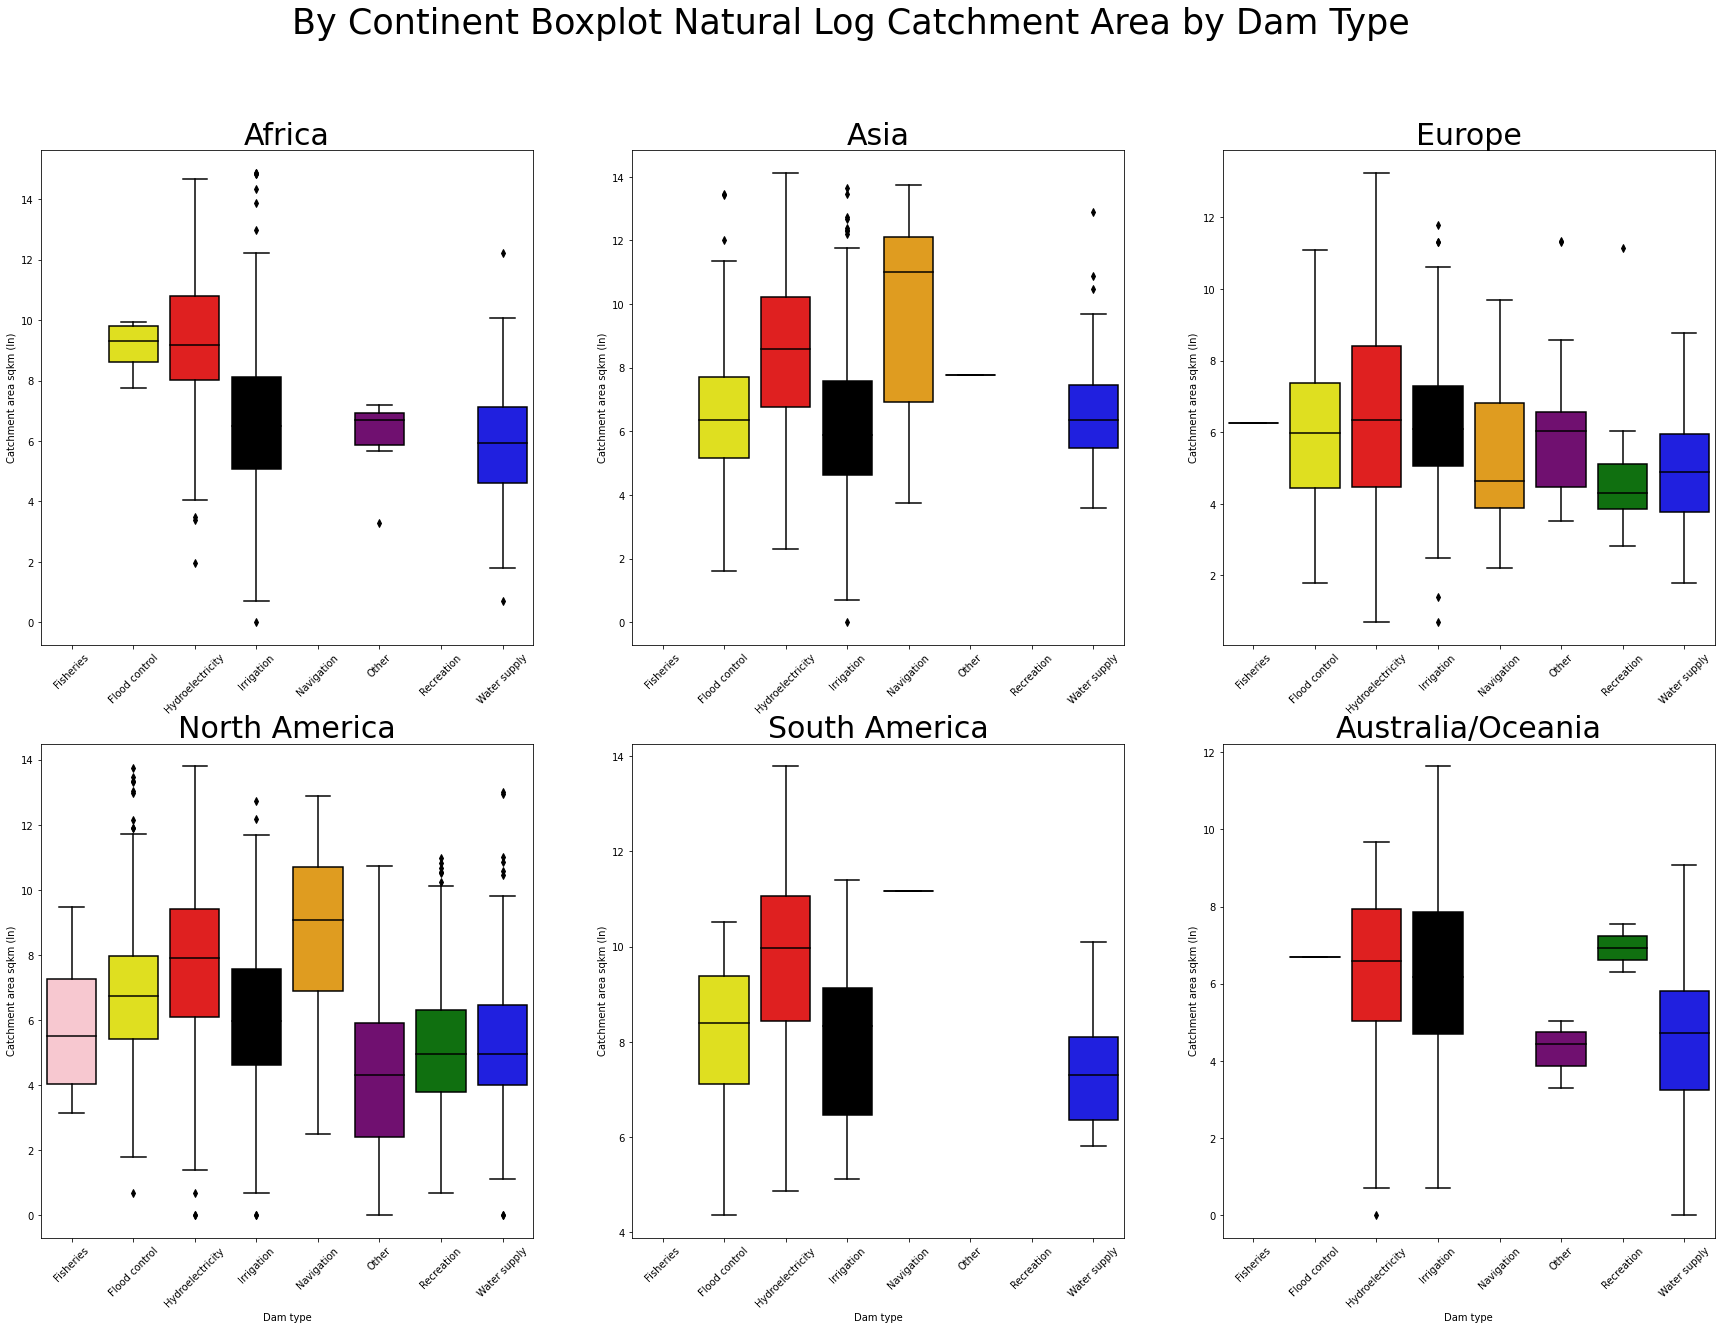

In [7]:
# Create boxplot figure of dam type counts by continent

# Plot the data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    ncols=3, nrows=2, figsize=(30, 20))
fig.suptitle(
    "By Continent Boxplot Natural Log Catchment Area by Dam Type", fontsize=35)

# Create plots
# Plot Africa
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_africa, palette=dam_color, ax=ax1)
ax1.xaxis.set_tick_params(rotation=45)
ax1.set(xlabel="", ylabel="Catchment area sqkm (ln)")
ax1.set_title('Africa', fontsize=30)

# Plot Asia
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_asia, palette=dam_color, ax=ax2)
ax2.xaxis.set_tick_params(rotation=45)
ax2.set(xlabel="", ylabel="Catchment area sqkm (ln)")
ax2.set_title('Asia', fontsize=30)

# Plot Europe
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_europe, palette=dam_color, ax=ax3)
ax3.xaxis.set_tick_params(rotation=45)
ax3.set(xlabel="", ylabel="Catchment area sqkm (ln)")
ax3.set_title('Europe', fontsize=30)

# Plot North America
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_namerica, palette=dam_color, ax=ax4)
ax4.xaxis.set_tick_params(rotation=45)
ax4.set(xlabel="Dam type",
        ylabel="Catchment area sqkm (ln)")
ax4.set_title('North America', fontsize=30)

# Plot South America
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_samerica, palette=dam_color, ax=ax5)
ax5.xaxis.set_tick_params(rotation=45)
ax5.set(xlabel="Dam type",
        ylabel="Catchment area sqkm (ln)")
ax5.set_title('South America', fontsize=30)

# Plot Australia and Oceania
sns.boxplot(x="MAIN_USE", y="ln_CATCH_SKM",
            data=dam_oceania, palette=dam_color, ax=ax6)
ax6.xaxis.set_tick_params(rotation=45)
ax6.set(xlabel="Dam type",
        ylabel="Catchment area sqkm (ln)")
ax6.set_title('Australia/Oceania', fontsize=30)


plt.show()